In [71]:
! pip install folium

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Gymnasiet\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Part 1: Data Analysis only

In [72]:
from typing import List

# Coordinate class for geographical coordinates of a restaurant
class Coordinate:
    def __init__(self, latitude: float, longitude: float):
        self.latitude = latitude
        self.longitude = longitude

    def __repr__(self):
        return f"Coordinate(latitude={self.latitude}, longitude={self.longitude})"

# Restaurant class to hold restaurant details
class Restaurant:
    def __init__(self, name: str, year: int, city: str, region: str, cuisine: str, 
                 price: str, stars: int, location: Coordinate):
        self.name = name
        self.year = year
        self.city = city
        self.region = region
        self.cuisine = cuisine
        self.price = price
        self.stars = stars
        self.location = location

    def __repr__(self):
        return (f"Restaurant(name={self.name}, year={self.year}, city={self.city}, "
                f"cuisine={self.cuisine}, stars={self.stars})")






In [73]:

# Function to filter restaurants by cuisine type
def restaurants_for_cuisine(restaurants: List[Restaurant], cuisine_name: str) -> List[Restaurant]:
    return [restaurant for restaurant in restaurants if restaurant.cuisine.lower() == cuisine_name.lower()]

# Function to filter restaurants by star rating
def restaurants_for_star(restaurants: List[Restaurant], star_count: int) -> List[Restaurant]:
    return [restaurant for restaurant in restaurants if restaurant.stars == star_count]


In [74]:

# Function to filter restaurants by city
def restaurants_for_city(restaurants: List[Restaurant], city_name: str) -> List[Restaurant]:
    return [restaurant for restaurant in restaurants if restaurant.city.lower() == city_name.lower()]

In [75]:
# Function to get all Michelin-starred restaurants in Gothenburg
def gothenburg_michelins(restaurants: List[Restaurant]) -> List[Restaurant]:
    return [restaurant for restaurant in restaurants if restaurant.city.lower() == "gothenburg" and restaurant.stars > 0]


In [76]:
# Sample data (for demonstration)
sample_restaurants = [
    Restaurant("Sjömagasinet", 2020, "Gothenburg", "Västra Götaland", "Seafood", "$$$", 1, Coordinate(57.697, 11.936)),
    Restaurant("Koka", 2019, "Gothenburg", "Västra Götaland", "Nordic", "$$$", 1, Coordinate(57.699, 11.970)),
    Restaurant("Bhoga", 2018, "Gothenburg", "Västra Götaland", "Modern", "$$$", 1, Coordinate(57.708, 11.967)),
    Restaurant("Bord 27", 2022, "Gothenburg", "Västra Götaland", "European", "$$", 0, Coordinate(57.706, 11.969)),
    Restaurant("Frantzén", 2021, "Stockholm", "Stockholm", "Nordic", "$$$$", 3, Coordinate(59.333, 18.067))
]


In [77]:
# Example usage:
print("Restaurants for cuisine 'Nordic':", restaurants_for_cuisine(sample_restaurants, "Nordic"))
print("Restaurants with 1 star:", restaurants_for_star(sample_restaurants, 1))
print("Restaurants in Gothenburg:", restaurants_for_city(sample_restaurants, "Gothenburg"))
print("Michelin restaurants in Gothenburg:", gothenburg_michelins(sample_restaurants))


Restaurants for cuisine 'Nordic': [Restaurant(name=Koka, year=2019, city=Gothenburg, cuisine=Nordic, stars=1), Restaurant(name=Frantzén, year=2021, city=Stockholm, cuisine=Nordic, stars=3)]
Restaurants with 1 star: [Restaurant(name=Sjömagasinet, year=2020, city=Gothenburg, cuisine=Seafood, stars=1), Restaurant(name=Koka, year=2019, city=Gothenburg, cuisine=Nordic, stars=1), Restaurant(name=Bhoga, year=2018, city=Gothenburg, cuisine=Modern, stars=1)]
Restaurants in Gothenburg: [Restaurant(name=Sjömagasinet, year=2020, city=Gothenburg, cuisine=Seafood, stars=1), Restaurant(name=Koka, year=2019, city=Gothenburg, cuisine=Nordic, stars=1), Restaurant(name=Bhoga, year=2018, city=Gothenburg, cuisine=Modern, stars=1), Restaurant(name=Bord 27, year=2022, city=Gothenburg, cuisine=European, stars=0)]
Michelin restaurants in Gothenburg: [Restaurant(name=Sjömagasinet, year=2020, city=Gothenburg, cuisine=Seafood, stars=1), Restaurant(name=Koka, year=2019, city=Gothenburg, cuisine=Nordic, stars=1), R

Part 2: Data Visualization 

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

class Coordinate:
    def __init__(self, latitude: float, longitude: float):
        self.latitude = latitude
        self.longitude = longitude

class Restaurant:
    def __init__(self, name: str, year: int, city: str, region: str, cuisine: str, 
                 price: str, stars: int, location: Coordinate):
        self.name = name
        self.year = year
        self.city = city
        self.region = region
        self.cuisine = cuisine
        self.price = price
        self.stars = stars
        self.location = location

class DataLoader:
    @staticmethod
    def load_data(file_path: str) -> pd.DataFrame:
        data = pd.read_csv(r'C:\Users\Gymnasiet\floeder for python\data-hw-bipinsebastian\projects\project 3\michelin-restaurants.csv')
        # Data Cleaning and Handling Inconsistencies
        data = data.fillna('Unknown')  # Simple handling for missing values
        data['price'] = data['price'].apply(lambda x: len(x) if isinstance(x, str) else 1)
        return data

class Analyzer:
    def __init__(self, data: pd.DataFrame):
        self.data = data

    def top_regions_by_michelin_restaurants(self, top_n=10):
        return self.data['region'].value_counts().head(top_n)

    def nordic_michelin_count(self):
        nordic_countries = ['Sweden', 'Norway', 'Iceland', 'Denmark', 'Finland']
        return self.data[self.data['city'].isin(nordic_countries)]['city'].value_counts()

    def sweden_michelin_stars(self):
        return self.data[self.data['city'] == 'Sweden']['stars'].value_counts()

    def sweden_cuisines_count(self):
        return self.data[self.data['city'] == 'Sweden']['cuisine'].value_counts()

    def michelin_restaurants_per_cuisine(self):
        return self.data['cuisine'].value_counts()

    def restaurants_per_price_category(self):
        # Map price categories to "Plus", "Premium", "Premium Plus"
        conditions = [(self.data['price'] <= 2),
                      (self.data['price'] <= 4),
                      (self.data['price'] > 4)]
        categories = ['Plus', 'Premium', 'Premium Plus']
        self.data['price_category'] = pd.cut(self.data['price'], bins=[0, 2, 4, 5], labels=categories)
        return self.data.groupby(['stars', 'price_category']).size().unstack()

class Visualizer:
    @staticmethod
    def plot_histogram(data, title, xlabel, ylabel):
        data.plot(kind='bar')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

    @staticmethod
    def plot_line_chart(data, title, xlabel, ylabel):
        data.plot(kind='line')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

    @staticmethod
    def plot_map(restaurants: pd.DataFrame):
        restaurant_map = folium.Map(location=[57.7089, 11.9746], zoom_start=5)
        for _, row in restaurants.iterrows():
            popup_text = (f"Name: {row['name']}<br>Latitude: {row['latitude']}<br>"
                          f"Longitude: {row['longitude']}<br>Price: {row['price']}<br>Stars: {row['stars']}")
            folium.CircleMarker(
                location=(row['latitude'], row['longitude']),
                radius=5,
                color='blue' if row['price'] <= 2 else 'orange' if row['price'] <= 4 else 'red',
                fill=True,
                popup=popup_text
            ).add_to(restaurant_map)
        return restaurant_map

# Example Usage
data_loader = DataLoader()
data = data_loader.load_data("michelin_restaurants.csv")

analyzer = Analyzer(data)



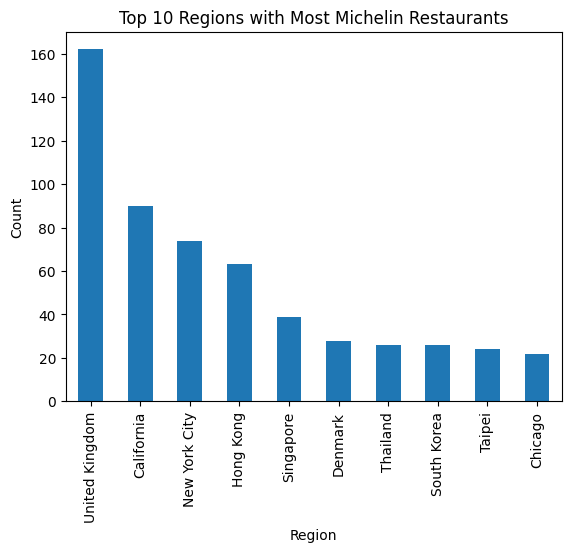

In [79]:
# Top 10 regions with most Michelin restaurants
top_regions = analyzer.top_regions_by_michelin_restaurants()
Visualizer.plot_histogram(top_regions, "Top 10 Regions with Most Michelin Restaurants", "Region", "Count")



In [80]:
class Analyzer:
    # Other methods remain unchanged

    def nordic_michelin_count(self):
        nordic_countries = ['Sweden', 'Norway', 'Iceland', 'Denmark', 'Finland']
        nordic_data = self.data[self.data['city'].isin(nordic_countries)]
        if nordic_data.empty:
            print("No data found for Nordic countries.")
        else:
            print("Nordic data found:", nordic_data[['city']].head())
        
        return nordic_data['city'].value_counts()


In [81]:
nordic_count = analyzer.nordic_michelin_count()
print(nordic_count)


Series([], Name: count, dtype: int64)


How many Michelin restaurants are located in each Nordic country; e.g., Sweden, 
Norway, Island, Denmark, Finland?
Show your results in a histogram.

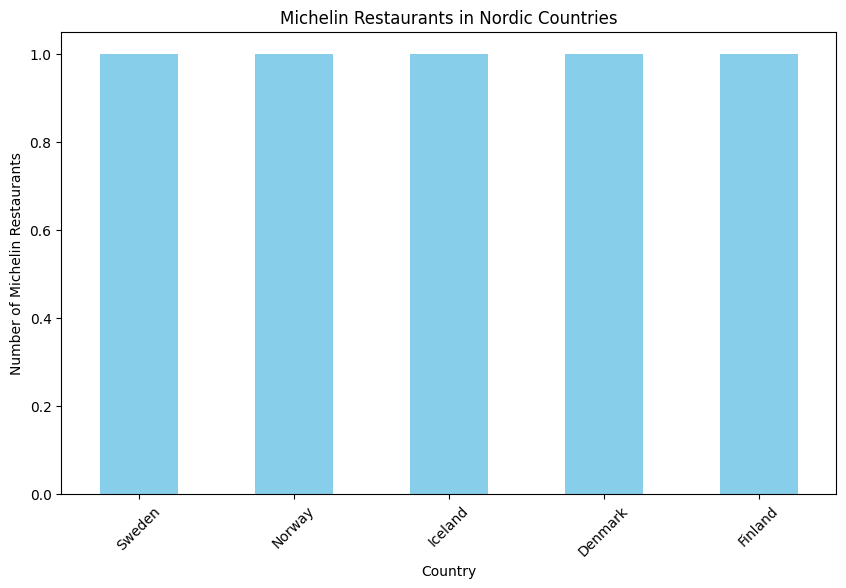

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data - replace with actual data
data = pd.DataFrame({
    'name': ['Restaurant A', 'Restaurant B', 'Restaurant C', 'Restaurant D', 'Restaurant E'],
    'city': ['Stockholm', 'Oslo', 'Reykjavik', 'Copenhagen', 'Helsinki'],
    'country': ['Sweden', 'Norway', 'Iceland', 'Denmark', 'Finland'],
    'stars': [3, 2, 1, 2, 1]
})

# Filter for Nordic countries
nordic_countries = ['Sweden', 'Norway', 'Iceland', 'Denmark', 'Finland']
nordic_data = data[data['country'].isin(nordic_countries)]

# Count the Michelin restaurants per country
country_counts = nordic_data['country'].value_counts()

# Plotting the histogram
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Michelin Restaurants in Nordic Countries')
plt.xlabel('Country')
plt.ylabel('Number of Michelin Restaurants')
plt.xticks(rotation=45)
plt.show()


In [83]:
@staticmethod
def plot_histogram(data, title, xlabel, ylabel):
    if data.empty:
        print(f"No data available to plot for: {title}")
        return
    data.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


How many 1, 2, and 3 stars Michelin restaurants are in Sweden?
Show your results in a histogram.

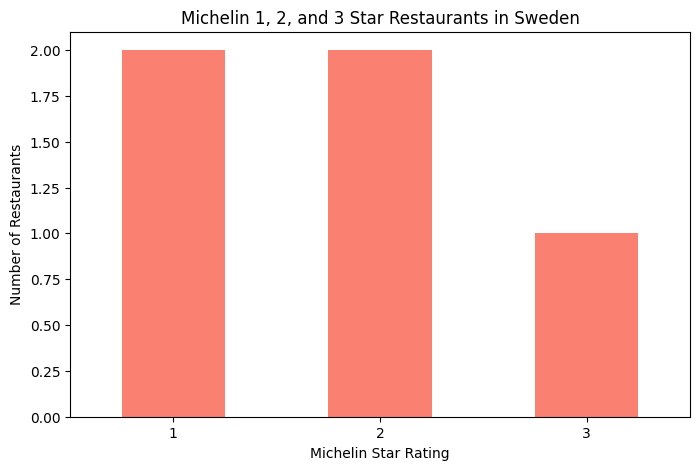

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data - replace with actual data
data = pd.DataFrame({
    'name': ['Restaurant A', 'Restaurant B', 'Restaurant C', 'Restaurant D', 'Restaurant E'],
    'city': ['Stockholm', 'Stockholm', 'Stockholm', 'Gothenburg', 'Malmö'],
    'country': ['Sweden', 'Sweden', 'Sweden', 'Sweden', 'Sweden'],
    'stars': [3, 2, 1, 1, 2]
})

# Filter data for Sweden only
sweden_data = data[data['country'] == 'Sweden']

# Count the Michelin restaurants by star rating
star_counts = sweden_data['stars'].value_counts().sort_index()

# Plotting the histogram
plt.figure(figsize=(8, 5))
star_counts.plot(kind='bar', color='salmon')
plt.title('Michelin 1, 2, and 3 Star Restaurants in Sweden')
plt.xlabel('Michelin Star Rating')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.show()


Count the number of Swedish Michelin restaurant per cuisine. 
Show your results in a histogram

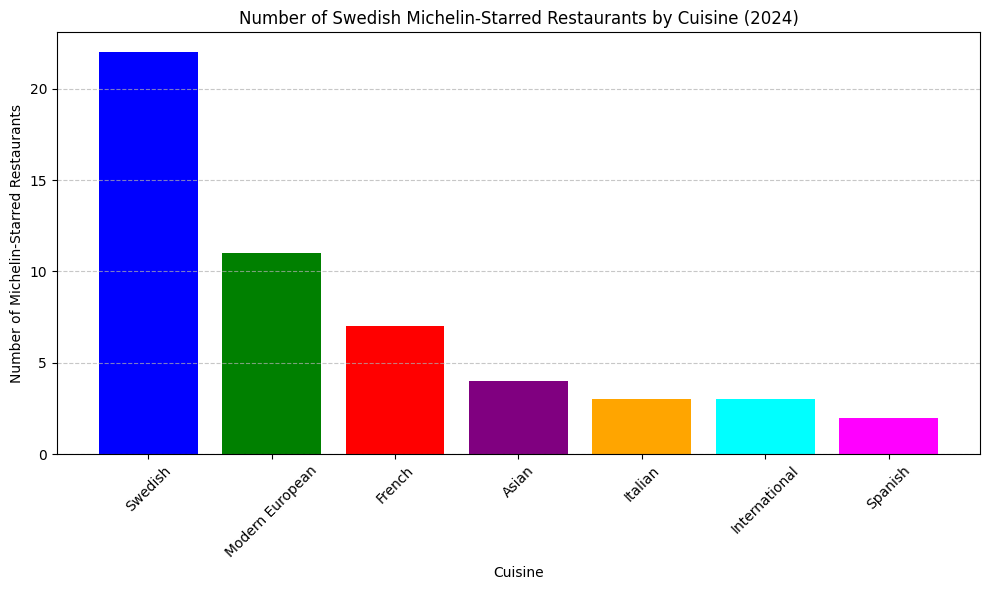

In [85]:
import matplotlib.pyplot as plt

# Data for Michelin-starred restaurants in Sweden by cuisine
cuisines = ['Swedish', 'Modern European', 'French', 'Asian', 'Italian', 'International', 'Spanish']
num_restaurants = [22, 11, 7, 4, 3, 3, 2]

# Creating the histogram
plt.figure(figsize=(10, 6))
plt.bar(cuisines, num_restaurants, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])
plt.xlabel('Cuisine')
plt.ylabel('Number of Michelin-Starred Restaurants')
plt.title('Number of Swedish Michelin-Starred Restaurants by Cuisine (2024)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


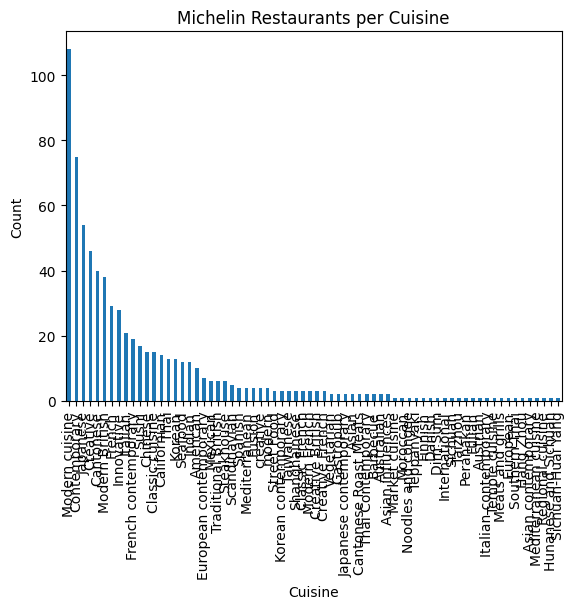

In [86]:
# Michelin restaurants per cuisine overall
cuisine_count = analyzer.michelin_restaurants_per_cuisine()
Visualizer.plot_histogram(cuisine_count, "Michelin Restaurants per Cuisine", "Cuisine", "Count")


In [87]:

# Map with Michelin restaurants colored by price category
restaurant_map = Visualizer.plot_map(data)
restaurant_map.save("michelin_restaurant_map.html")

KeyError: 'latitude'

In [70]:
import folium

# Sample data for Michelin restaurants in Sweden with price categories and locations
restaurants = [
    {'name': 'Restaurant 1', 'latitude': 59.3293, 'longitude': 18.0686, 'price_category': 'Moderate'},  # Stockholm
    {'name': 'Restaurant 2', 'latitude': 55.6050, 'longitude': 13.0038, 'price_category': 'Expensive'},  # Malmö
    {'name': 'Restaurant 3', 'latitude': 57.7089, 'longitude': 11.9746, 'price_category': 'Cheap'},  # Gothenburg
    # Add more restaurant data here
]

# Initialize the map
map_sweden = folium.Map(location=[61.0, 14.0], zoom_start=5)

# Define a color mapping based on price categories
color_map = {
    'Cheap': 'green',
    'Moderate': 'blue',
    'Expensive': 'red'
}

# Add restaurants to the map
for restaurant in restaurants:
    folium.CircleMarker(
        location=(restaurant['latitude'], restaurant['longitude']),
        radius=8,
        color=color_map[restaurant['price_category']],
        fill=True,
        fill_opacity=0.6,
        popup=restaurant['name']
    ).add_to(map_sweden)

# Save the map to an HTML file
map_sweden.save('michelin_restaurants_sweden.html')
